<span style="background-color: lightgreen"><font size =6>Programming / AI: College Research</font></span>


**In this excercise, we will summarize all us universities**

# Load Wiki

**In a technical term, steps are:**

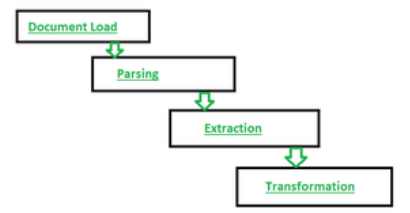

In [15]:
import os
from IPython.display import Image, display, Markdown

DOCUMENTS_PATH = os.getcwd()

display(Markdown("**In a technical term, steps are:**"))
display(Image(f"{DOCUMENTS_PATH}/standard_flow.png"))

## which libraries 

In [3]:
import os 
import re 
import requests 
import numpy as np
import math
from bs4 import BeautifulSoup  
import pandas as pd 
from pathlib import Path
import nltk 
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt
from PIL import Image as img
import time

import wikipedia
import wordcloud

In [4]:
DOCUMENT_PATH = os.getcwd()
file = f"{DOCUMENT_PATH}/USColleges.csv"

200

In [154]:
def scrape_us_college_list(url = None):
    if not url:
        url = "https://www.4icu.org/us/a-z/#uni"
    response = requests.get(url)
    
    if response.status_code != 200:
        return 

    soup = BeautifulSoup(response.content)
    
    tabs = soup.findAll("table", class_ = "table table-hover")

    one_row = []
    all_rows = []
    for tr in tabs[0].findAll("tr")[:]:
        cols = tr.findAll("th")
        if cols:
            for col in cols:
                one_row.append(col.get_text())

            all_rows.append(one_row)
            break

    for tr in tabs[0].findAll("tr")[2:]:
        cols = tr.findAll("td")
        one_row = []
        for col in cols:
            for href in col.findAll("a"):
                url = href["href"] 
                one_row.append(url) 
            one_row.append(col.get_text()) 
        all_rows.append(one_row)

    df_college = pd.DataFrame(all_rows[1:], columns =  ["Rank", "url", "College", "Town"])
    #df_college[df_college["College"].str.contains("Massachusetts")]
    df_college.to_csv(file, index=False)
    
    return file


In [6]:
file = f"{DOCUMENT_PATH}/USColleges.csv"
df_college = pd.read_csv(file)
df_college.tail(4)

,Rank,url,College,Town
1762,1286,/reviews/6068.htm,"York College, City University of New York",Jamaica
1763,1552,/reviews/16954.htm,Young Harris College,Young Harris
1764,486,/reviews/6354.htm,Youngstown State University,Youngstown
1765,Legend: Un Unranked,/about/add.htm,Add University,NaN


In [192]:
def get_summaries(file = None, save_to_file = None ):
    if not file:
        file = f"{DOCUMENT_PATH}/USColleges.csv"
    
    if not save_to_file:
        save_to_file = f"{DOCUMENT_PATH}/USCollegesWithSummary.csv"
        
    df_college = pd.read_csv(file)
    i = 1
    lines = []
    for col in df_college.itertuples():
        try: 
            
            line = list(col) 
            rank, school_url, college, town   = line[1], line[2], line[3], line[4]

            url = "https://www.4icu.org" + school_url
       
            sub_response = requests.get(url)
            if sub_response.status_code != 200: 
                continue
      
            sub_ = BeautifulSoup(sub_response.content)
            wiki = sub_.findAll("a") 
            web_url = "" 
            wik_url = ""
 
            for wik in wiki:  
                if re.search("https://en.wikipedia.org", wik["href"]):
                    if wik_url == "":
                        wik_url = wik["href"]
                if wik.has_attr('itemprop'): 
                    if web_url == "":
                        if wik["href"][-4:] == ".edu":
                            web_url = wik["href"]
                            #print(wik["href"][-4:], wik["href"])


                #if re.search("https://en.wikipedia.org", wik["rel"]):
                #    web_url = wik["href"]
                #    print(web_url)
            line.append(wik_url)
            line.append(web_url)
            ##print(len(sub_.findAll("table", class_ = "borderless")))
            #divs = sub_.findAll("div", class_ = "col-md-6")
            #for div in divs:
            #    for tab in sub_.findAll("table", class_ = "borderless"):
            #        print(tab)

            textp = sub_.findAll("p", class_ = "text-justify")
            line.append(textp[0].get_text()) 

            lines.append(line) 
            if i > 10:
                break
        except:
            i += 1
            pass  
        
    df = pd.DataFrame(lines, columns = ["Seq", "Rank", "School_url", "College", "Town", "Wiki", "Web", "Summary"])
 
    df.to_csv(save_to_file, index=False)
    
    return  lines, df, save_to_file

In [193]:
lines, df, save_to_file = get_summaries()

# Py Learning from Above

## List: advanced 
## Exception (optional)
## access a list

# Colab Review